In [29]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\kahar's\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
import os
#path=os.getcwd()
path ='B:\\Machine Learning Bijay Explore\\DataMites\\Data'
os.chdir(path)
os.getcwd()

'B:\\Machine Learning Bijay Explore\\DataMites\\Data'

In [4]:
def parser(x):
    return datetime.strptime(x,"%Y-%m")
data = pd.read_csv('sales-cars.csv',index_col=0,parse_dates=[0],date_parser =parser)

data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


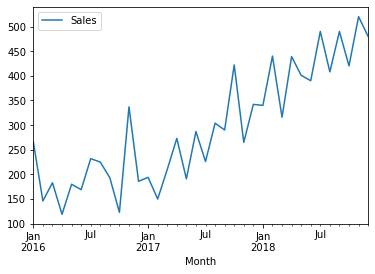

In [6]:
data.plot()

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot.acf(data)

AttributeError: 'function' object has no attribute 'acf'

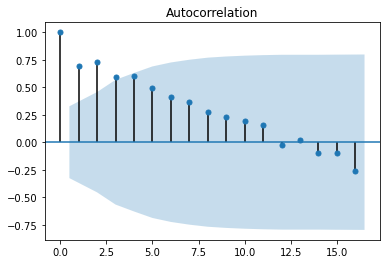

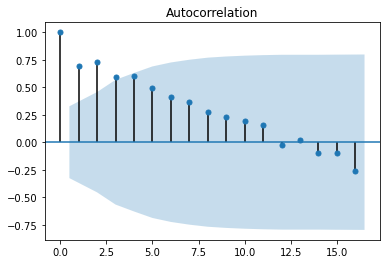

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)


In [14]:
#converting into stationary series
sales_diff = data.diff(periods=1)

In [15]:
sales_diff = sales_diff[1:]

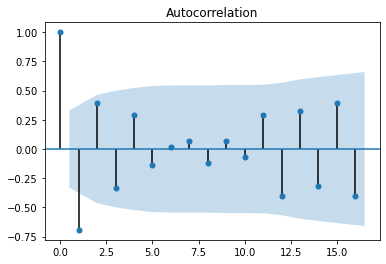

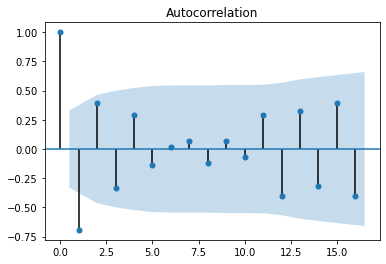

In [16]:
plot_acf(sales_diff)

In [18]:
X=data.Sales
train = X[0:27]
test=X[27:]
predict=[]

In [19]:
#Autoregressor Model

In [20]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit= model_ar.fit()

c:\users\kahar's\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DE

In [21]:
predict=model_ar_fit.predict(start=26,end=36)

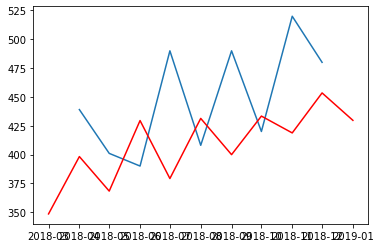

In [22]:
plt.plot(test)
plt.plot(predict,color='red')

In [23]:
#ARIMA MODEL 
from statsmodels.tsa.arima_model import ARIMA

In [24]:
model_arima=ARIMA(train,order=(3,1,0))
model_arima_fit= model_arima.fit()
print(model_arima_fit.aic)

c:\users\kahar's\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\kahar's\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


294.8543584218716


In [25]:
predict_arima=model_arima_fit.forecast(steps=9)[0]

In [26]:
predict_arima

array([393.12486586, 367.08446867, 432.19162756, 370.18111814,
       424.07790947, 400.33333978, 444.76762674, 412.54139081,
       450.3590622 ])

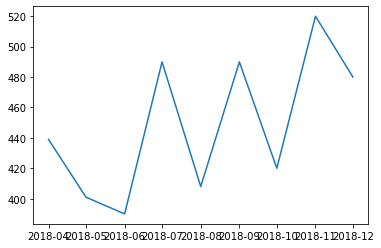

In [32]:
plt.plot(test)


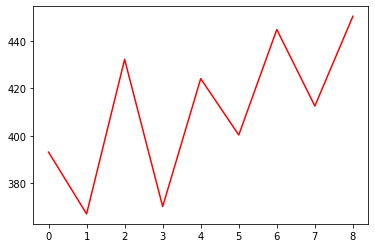

In [33]:
plt.plot(predict_arima,color='red')

In [34]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [35]:
import warnings 
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093849175
(0, 0, 2) 315.2506002871481
(0, 0, 3) nan
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415282701264
(0, 1, 2) 296.32292269076794
(0, 1, 3) 298.3120211738984
(0, 1, 4) 300.33939756184486
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019491895665
(0, 2, 2) 290.3983339806683
(0, 2, 3) 292.98588766699555
(1, 0, 0) 316.1668717522325
(1, 0, 1) 313.0487174409966
(1, 0, 2) 310.9790642222476
(1, 0, 4) 309.6779931216631
(1, 1, 0) 298.8325442270912
(1, 1, 1) 297.12565112585037
(1, 1, 2) 299.47166670627337
(1, 1, 3) 301.28511809485303
(1, 1, 4) 299.9787323970914
(1, 2, 0) 306.53077675708835
(1, 2, 3) 290.3253393178794
(2, 0, 0) 310.99695736122
(2, 0, 1) 339.8172985186335
(2, 1, 0) 300.2089561240165
(2, 1, 1) 297.99999301674205
(2, 1, 2) 298.55054281302273
(2, 1, 3) 302.8720823773577
(2, 2, 0) 306.2975856434268
(3, 0, 0) 312.98385874191604
(3, 0, 1) 334.7060744180335
(3, 1, 0) 294.8543584218716
(3, 1, 1) 295.99793534183874
(3, 1, 2